In [67]:
import os
import matplotlib
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [68]:
DOE_NAME = "doe5"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [69]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [70]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)
df_res["FIT"] = df_res["FIT"].fillna(0.0)
#df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [71]:
#for factor in factors:
#    df_res[factor] = df_res[factor].astype("category")

In [72]:
df_res.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
272,539,0.001,10000,3600,1024,40,80,forward,ZERO,15,376,98.982300,2.433808
97,368,0.001,10000,3600,512,160,80,forward,FF,15,752,98.892609,2.648296
156,125,0.001,10000,3600,128,160,40,forward,LSTM,15,694,98.874496,2.691602
165,746,0.001,10000,3600,32,160,80,forward,RAND,15,174,98.846344,2.758948
177,170,0.001,10000,3600,32,160,80,forward,LSTM,15,597,98.722397,3.055345
184,62,0.001,10000,3600,32,80,20,forward,LSTM,15,626,98.669037,3.182968
99,353,0.001,10000,3600,128,80,80,forward,FF,15,731,98.646317,3.237299
26,113,0.001,10000,3600,128,80,40,forward,LSTM,15,187,98.645416,3.239444
278,218,0.001,10000,3600,32,160,10,forward,FF,15,294,98.629593,3.277287
303,23,0.001,10000,3600,1024,80,10,forward,LSTM,15,352,98.610794,3.322253


In [73]:
df_res.tail(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
748,521,0.001,10000,3600,128,320,40,forward,ZERO,15,699,0.0,1000.0
749,145,0.001,10000,1800,32,40,80,forward,LSTM,15,671,0.0,1000.0
750,560,0.001,10000,3600,512,160,80,forward,ZERO,15,199,0.0,1000.0
751,318,0.001,10000,300,512,160,40,forward,FF,15,489,0.0,1000.0
752,741,0.001,10000,300,1024,80,80,forward,RAND,15,115,0.0,1000.0
753,116,0.001,10000,3600,512,80,40,forward,LSTM,15,279,0.0,1000.0
754,596,0.001,10000,3600,512,80,10,forward,RAND,15,591,0.0,1000.0
755,457,0.001,10000,1800,32,160,20,forward,ZERO,15,685,0.0,1000.0
756,144,0.001,10000,300,32,40,80,forward,LSTM,15,64,0.0,1000.0
757,323,0.001,10000,3600,1024,160,40,forward,FF,15,125,0.0,1000.0


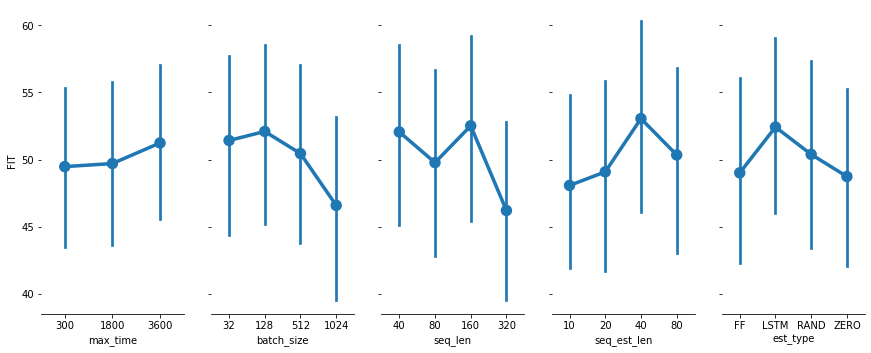

In [74]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

# Biggest effect seems to be max_time

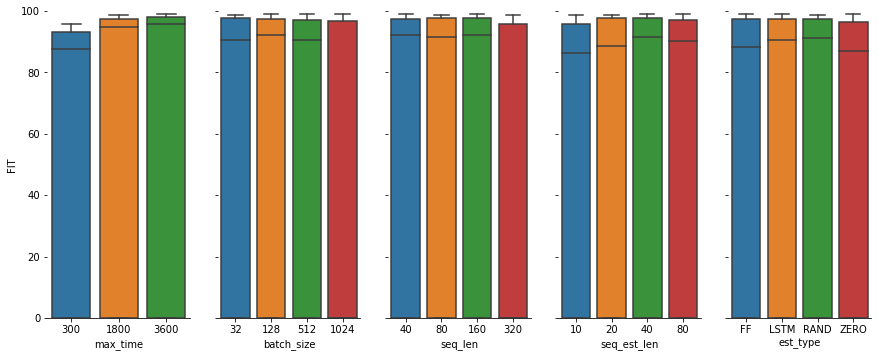

In [100]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(0, 100))
sns.despine(fig=g.fig, left=True)

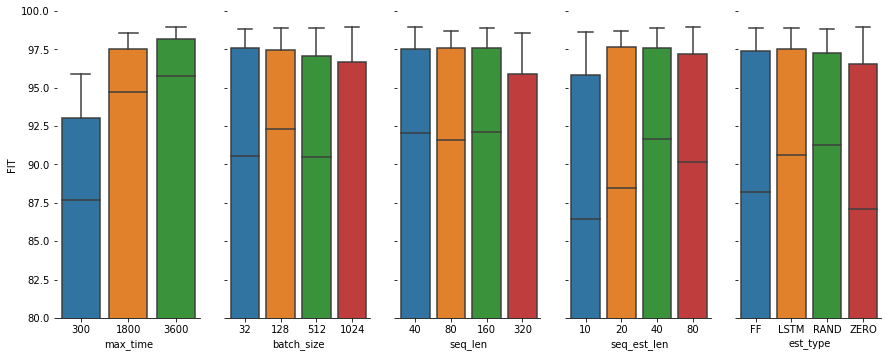

In [76]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(80, 100))
sns.despine(fig=g.fig, left=True)

In [77]:
fig = make_subplots(rows=1, cols=5)
for idx, factor in enumerate(factors):
    aa=fig.add_box(y=df_res["FIT"], x=df_res[factor], row=1, col=idx+1, name=factor)#, label="a") 
    fig.update_yaxes(range=[80, 100], row=1, col=idx+1)
fig.show()

In [78]:
#fig.select_xaxes

In [79]:
df_res.groupby("seq_len")["FIT"].agg(["median", "mean", "std"])
#df_res.groupby("lr")["FIT"].agg(["mean", "std"])

,median,mean,std
seq_len,,,
40,92.053940,52.063242,48.051840
80,91.590343,49.782267,48.398392
160,92.121365,52.520203,47.969332
320,0.000000,46.213652,47.380529


In [80]:
#pd.pivot_table(df_res, index=["seq_len"], columns=["est_type"])

In [81]:
fig = px.scatter(df_res, y="FIT",
                 facet_col="est_type", facet_row="est_direction", color="seq_len",
                 hover_data=["max_time", "seq_est_len"])
fig.show()

In [82]:
df_30min = df_res[(df_res["max_time"] != 300)]

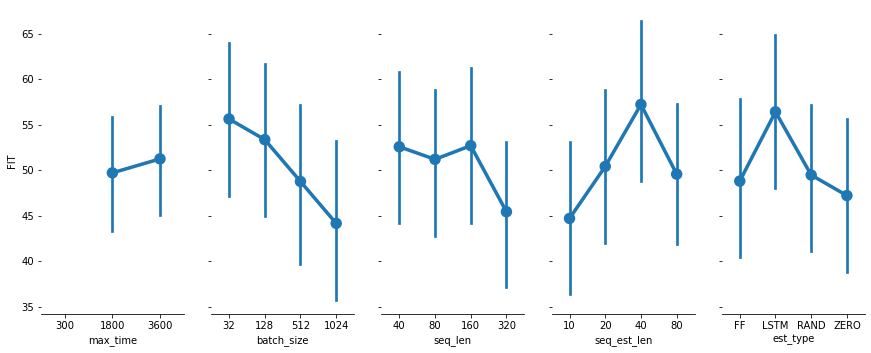

In [83]:
# Full results: main effects
g = sns.PairGrid(df_30min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [84]:
df_zero= df_res[(df_res["max_time"] != 300) & ((df_res["est_type"] == "ZERO"))]

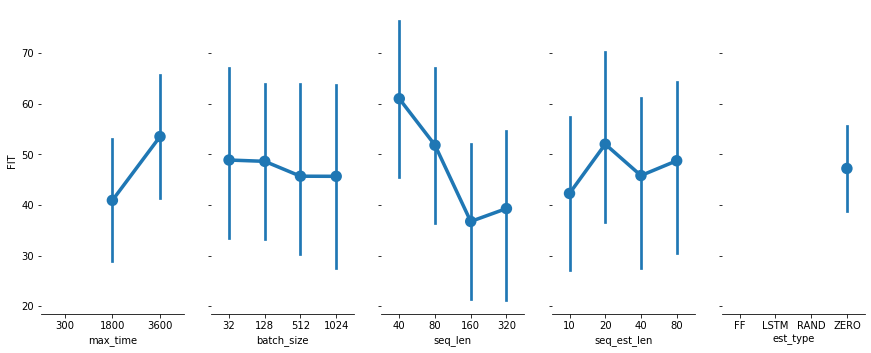

In [85]:
# Full results: main effects
g = sns.PairGrid(df_zero, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [86]:
df_5min = df_res[(df_res["max_time"] == 300)]

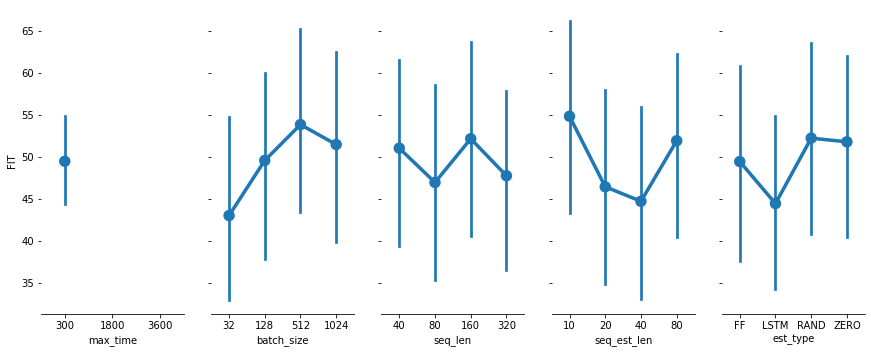

In [87]:
# Full results: main effects
g = sns.PairGrid(df_5min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [88]:
df_good = df_res[(df_res["max_time"] != 300) & (df_res["est_type"]== "FF")]

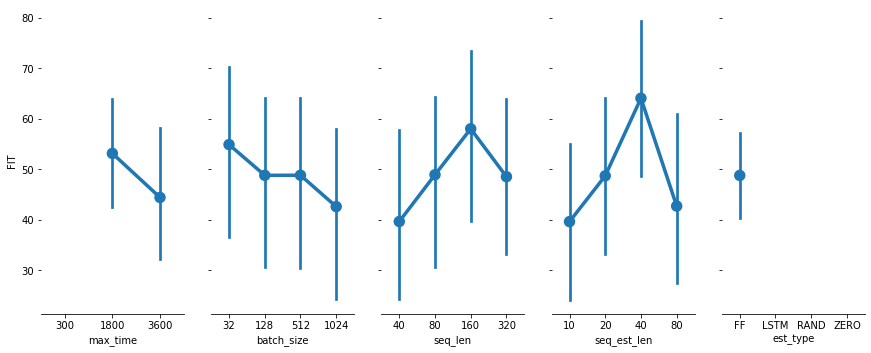

In [89]:
# Full results: main effects
g = sns.PairGrid(df_good, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [90]:
fig = px.scatter(df_30min, y="FIT",
                 facet_col="est_type", facet_row="est_direction", color="seq_len",
                 hover_data=["max_time", "seq_est_len"])
fig.show()

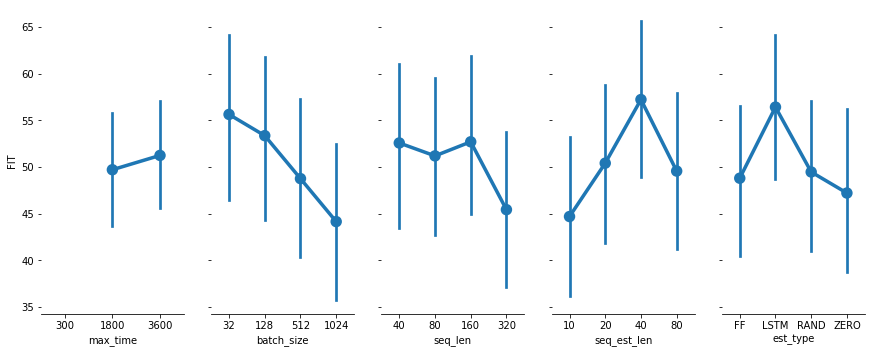

In [91]:
# Full results: main effects
g = sns.PairGrid(df_30min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

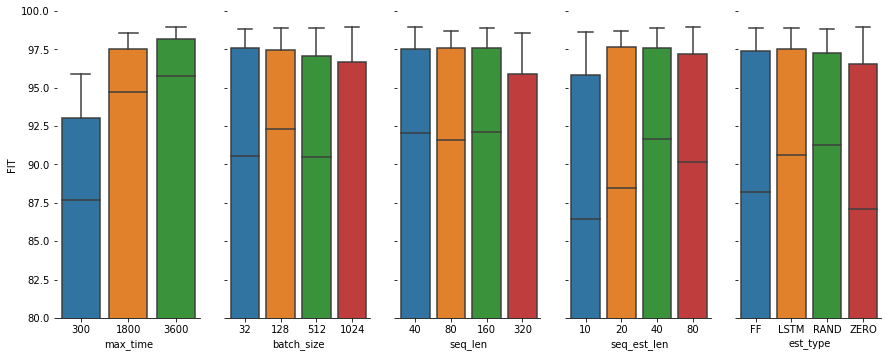

In [92]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(80, 100))
sns.despine(fig=g.fig, left=True)

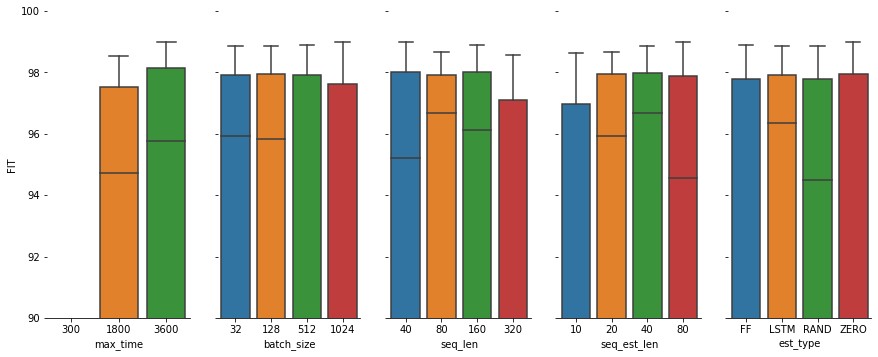

In [93]:
# Full results: main effects
g = sns.PairGrid(df_30min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(90, 100))
sns.despine(fig=g.fig, left=True)

In [94]:
df_5min.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
170,627,0.001,10000,300,128,40,20,forward,RAND,15,269,95.894623,9.817894
381,291,0.001,10000,300,128,40,40,forward,FF,15,233,95.680252,10.330549
327,339,0.001,10000,300,128,40,80,forward,FF,15,492,95.639191,10.428766
227,435,0.001,10000,300,128,40,20,forward,ZERO,15,457,95.573708,10.585358
82,207,0.001,10000,300,128,80,10,forward,FF,15,566,95.504936,10.749815
192,63,0.001,10000,300,128,80,20,forward,LSTM,15,266,95.494270,10.775328
201,306,0.001,10000,300,512,80,40,forward,FF,15,46,95.443298,10.897241
365,147,0.001,10000,300,128,40,80,forward,LSTM,15,310,95.428223,10.933283
51,159,0.001,10000,300,128,80,80,forward,LSTM,15,193,95.408096,10.981401
37,66,0.001,10000,300,512,80,20,forward,LSTM,15,355,95.356422,11.104985


In [95]:
df_short_est = df_res[(df_res["seq_est_len"] == 10)]
df_short_est.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
278,218,0.001,10000,3600,32,160,10,forward,FF,15,294,98.629593,3.277287
303,23,0.001,10000,3600,1024,80,10,forward,LSTM,15,352,98.610794,3.322253
186,17,0.001,10000,3600,128,80,10,forward,LSTM,15,55,98.577698,3.401407
401,221,0.001,10000,3600,128,160,10,forward,FF,15,367,98.570923,3.417603
180,5,0.001,10000,3600,128,40,10,forward,LSTM,15,103,98.471809,3.654629
145,4,0.001,10000,1800,128,40,10,forward,LSTM,15,529,98.450241,3.706205
132,14,0.001,10000,3600,32,80,10,forward,LSTM,15,737,98.385025,3.862178
104,227,0.001,10000,3600,1024,160,10,forward,FF,15,188,98.256966,4.168418
362,29,0.001,10000,3600,128,160,10,forward,LSTM,15,496,98.224854,4.245208
364,35,0.001,10000,3600,1024,160,10,forward,LSTM,15,404,98.223648,4.248096


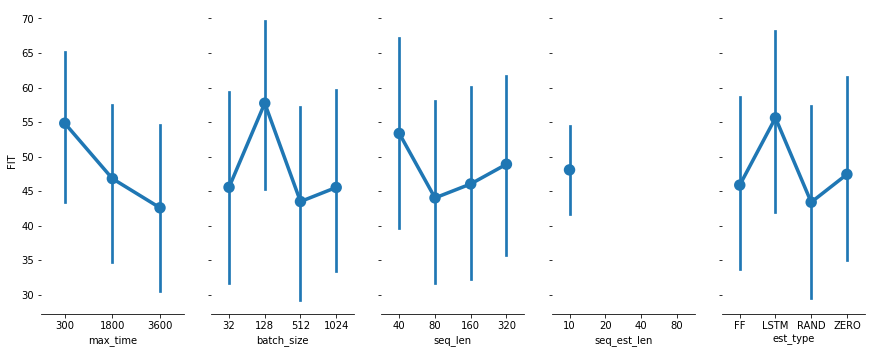

In [96]:

# Full results: main effects
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

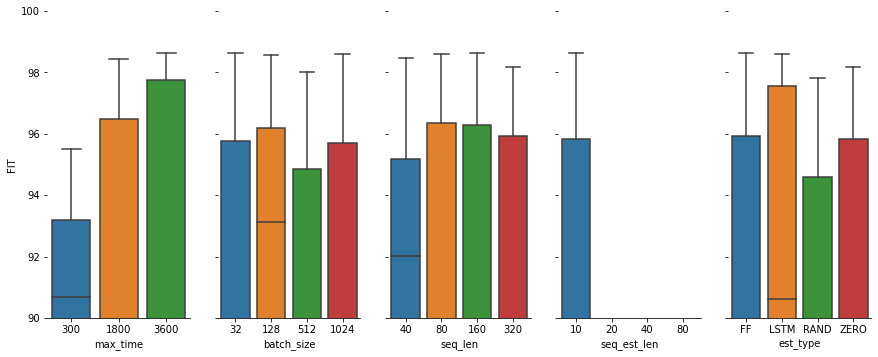

In [97]:
# Full results: main effects
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(90, 100))
sns.despine(fig=g.fig, left=True)

In [98]:
df_short_train = df_res[(df_res["seq_len"] == 40) & (df_res["seq_est_len"] == 10)]
df_short_train.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
180,5,0.001,10000,3600,128,40,10,forward,LSTM,15,103,98.471809,3.654629
145,4,0.001,10000,1800,128,40,10,forward,LSTM,15,529,98.450241,3.706205
151,202,0.001,10000,1800,1024,40,10,forward,FF,15,35,97.709511,5.477643
255,1,0.001,10000,1800,32,40,10,forward,LSTM,15,122,97.539368,5.884529
222,2,0.001,10000,3600,32,40,10,forward,LSTM,15,113,97.225960,6.634050
48,392,0.001,10000,3600,512,40,10,forward,ZERO,15,237,96.215141,9.051389
291,388,0.001,10000,1800,128,40,10,forward,ZERO,15,100,95.871552,9.873079
266,389,0.001,10000,3600,128,40,10,forward,ZERO,15,679,95.796303,10.053026
384,394,0.001,10000,1800,1024,40,10,forward,ZERO,15,56,95.556435,10.626674
218,587,0.001,10000,3600,1024,40,10,forward,RAND,15,129,95.301231,11.236983


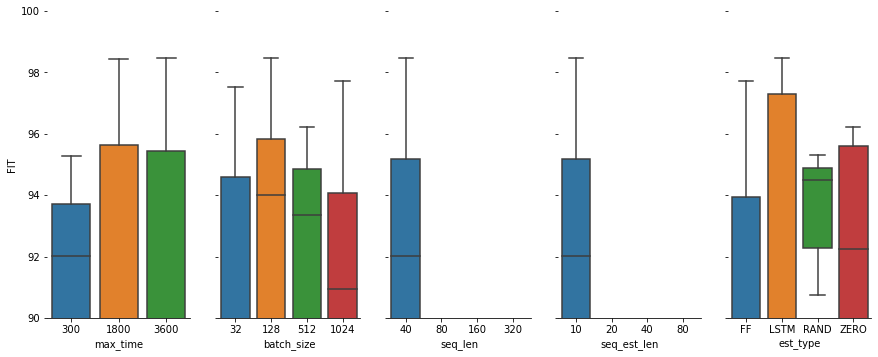

In [99]:
# Full results: main effects
g = sns.PairGrid(df_short_train, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(90, 100))
sns.despine(fig=g.fig, left=True)